In [ ]:
 import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from scipy import stats

In [ ]:
filename = "/content/BostonHousing.csv"

df = pd.read_csv(filename)
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
missing_values = df.isnull().sum() #for each column this stores the number of na in an array
print(missing_values)


crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


In [ ]:
#finding correlation  It calculates the correlation matrix to understand relationships between variables.
corr_matrix_medv = df.corr()["medv"]

#correlation with target variable
target_corr = np.abs(df.corrwith(df["medv"]))#finding absolute
print(target_corr.sort_values(ascending=False)) #printing in descending order

medv       1.000000
lstat      0.737663
rm         0.695360
ptratio    0.507787
indus      0.483725
tax        0.468536
nox        0.427321
crim       0.388305
rad        0.381626
age        0.376955
zn         0.360445
b          0.333461
dis        0.249929
chas       0.175260
dtype: float64


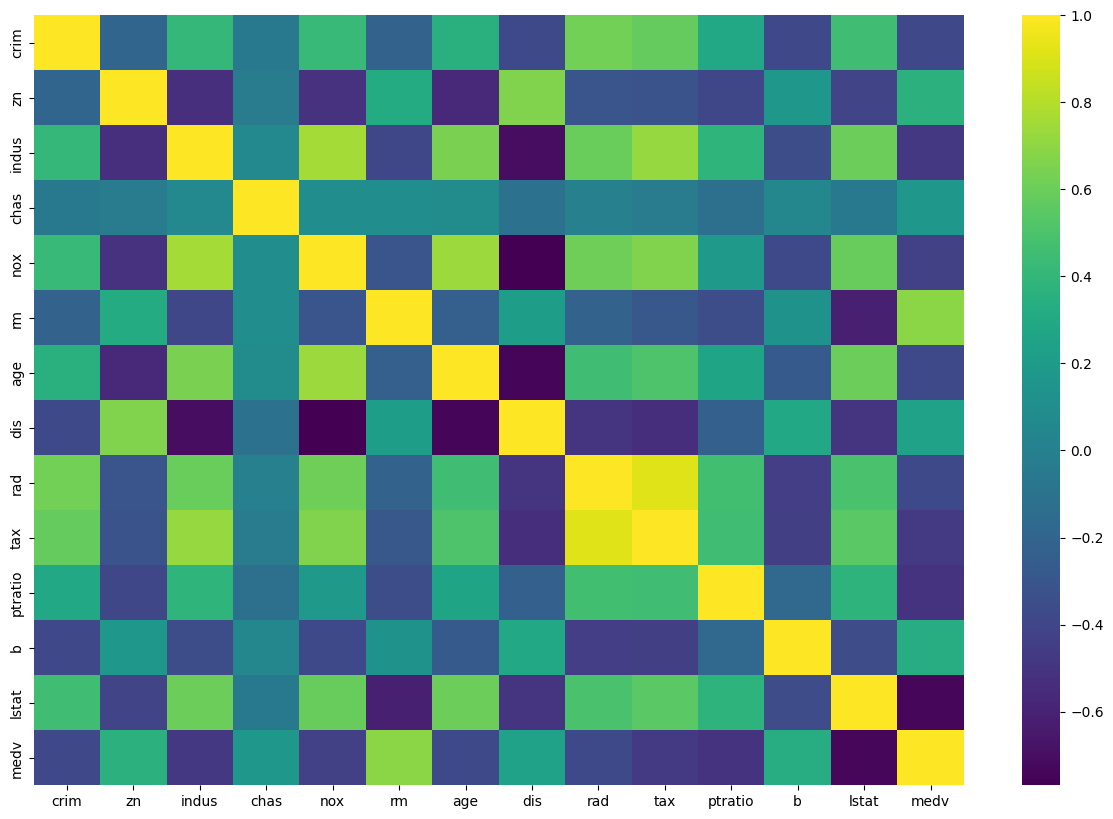

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,cmap="viridis", annot=False)
plt.show()

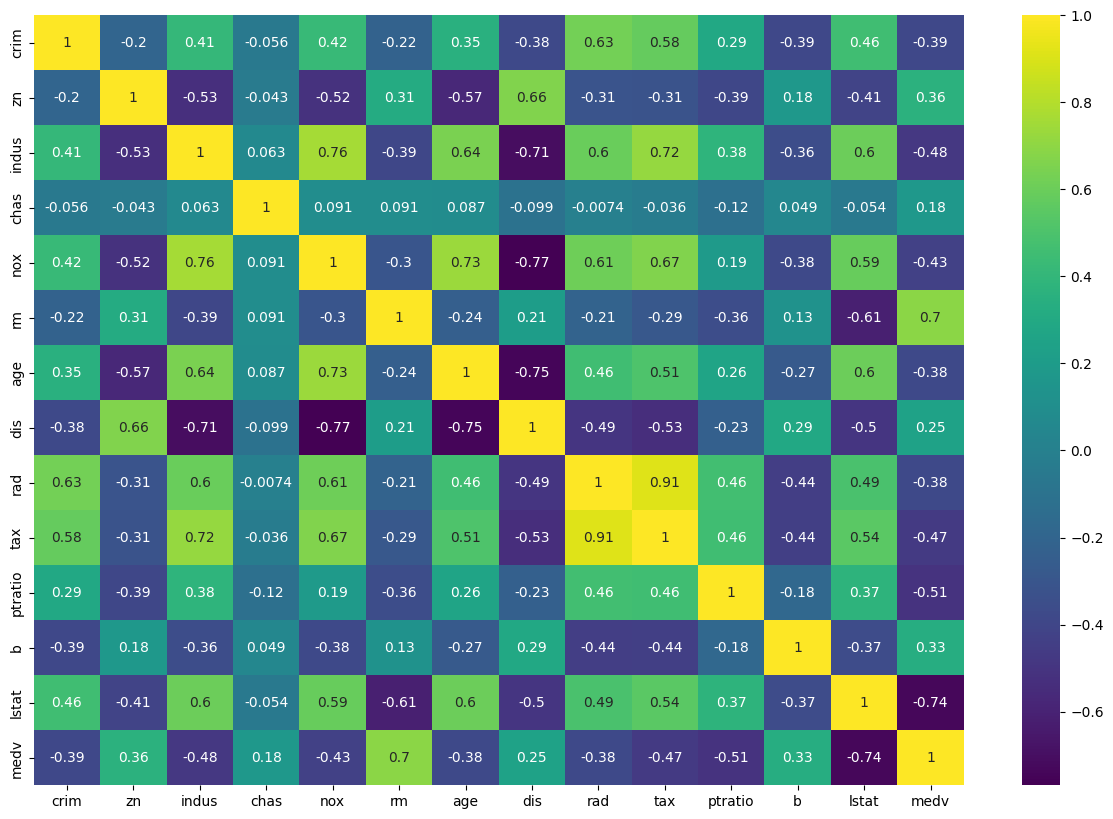

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,cmap="viridis", annot=True)
plt.show()

In [ ]:
#splitting the data into training and testing sets
X = df.drop(["medv"], axis=1) #all attributes except the dependent
y = df["medv"] #dependent attribute
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
#feature scaling is import before training any data, It standardizes the features to have zero mean and unit variance, improving model performance.
scaler = StandardScaler()

#only scaling X coz there are multiple rows and y has just one so no need scale it
X_train_scaled = scaler.fit_transform(X_train)#fit_transform is used on training data
X_test_scaled = scaler.transform(X_test)

In [ ]:
#Creating Linear Regression Model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
#prediction
y_pred = model.predict(X_test_scaled)
print(y_pred)

[24.88963777 23.72141085 29.36499868 12.12238621 21.44382254 19.2834443
 20.49647539 21.36099298 18.8967118  19.9280658   5.12703513 16.3867396
 17.07776485  5.59375659 39.99636726 32.49654668 22.45798809 36.85192327
 30.86401089 23.15140009 24.77495789 24.67187756 20.59543752 30.35369168
 22.41940736 10.23266565 17.64816865 18.27419652 35.53362541 20.96084724
 18.30413012 17.79262072 19.96561663 24.06127231 29.10204874 19.27774123
 11.15536648 24.57560579 17.5862644  15.49454112 26.20577527 20.86304693
 22.31460516 15.60710156 23.00363104 25.17247952 20.11459464 22.90256276
 10.0380507  24.28515123 20.94127711 17.35258791 24.52235405 29.95143046
 13.42695877 21.72673066 20.7897053  15.49668805 13.98982601 22.18377874
 17.73047814 21.58869165 32.90522136 31.11235671 17.73252635 32.76358681
 18.7124637  19.78693475 19.02958927 22.89825374 22.96041622 24.02555703
 30.72859326 28.83142691 25.89957059  5.23251817 36.72183202 23.77267249
 27.26856352 19.29492159 28.62304496 19.17978838 18.9

In [ ]:
#Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error is: {mse}")

Mean Squared Error is: 33.44897999767651


In [ ]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root mean squared error: {rmse}")


Root mean squared error: 5.7835093150851336


In [ ]:
#R squared
r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2}")

R2 Score: 0.5892223849182511


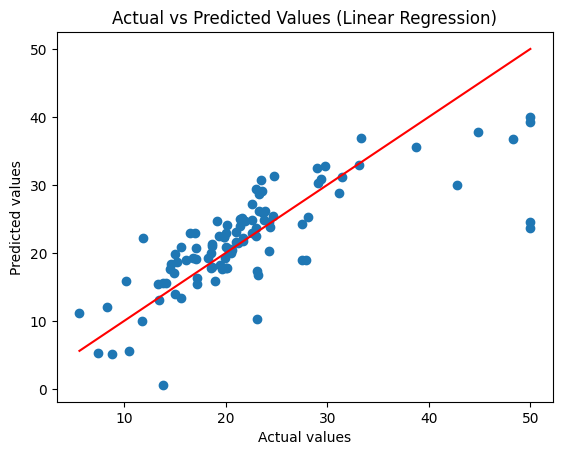

In [ ]:
#plotting predicted values against actual values
plt.scatter(y_test,y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs Predicted Values (Linear Regression)")

# Plot a line of best fit
x = [min(y_test), max(y_test)]
y = [min(y_test), max(y_test)]
plt.plot(x, y, 'r')
plt.show()

In [ ]:
# create a new DataFrame with the custom input values, ensuring the column names and order match the original data
custom_input = pd.DataFrame({
    'crim': [0.147],
    'zn':[2],
    'indus': [8.50],
    'nox': [0.53],
    'rm': [6.728],
    'age': [79.5],
    'rad': [5],
    'tax': [385],
    'ptratio':[20.9],
    'b':[395.0],
    'lstat':[9.42],
    'chas':[0],
    'dis':[3]
}, columns=['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'chas', 'dis']) # Ensure the column order matches the original data

# Get the column names from the training data (assuming 'X_train' was used for training)
training_columns = X_train.columns

# Reorder the columns of custom_input to match the training data
custom_input = custom_input[training_columns]

# scale the input values using the same scaling parameters as the training set
custom_input_scaled = scaler.transform(custom_input)

# make a prediction using the trained model
prediction = model.predict(custom_input_scaled)

# print the predicted value
print("Predicted value:", prediction[0])

Predicted value: 23.90120068760073


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"R2 Score (Random Forest): {r2_rf}")

R2 Score (Random Forest): 0.7735416560451722
